Michelin Restaurants

### Data Preprocessing

In [ ]:
import pandas as pd

df = pd.read_csv('michelin-restaurants.csv')

print('-----------------------------------------------')
print('----- print 5 first rows of Data -------')
print(df.head(5))
print('-----------------------------------------------')


print('-----------------------------------------------')
print('----- Descriptive Statistical Measures of Data -------')
print(df.describe())
print('-----------------------------------------------')

print('-----------------------------------------------')
print('----- Summary of Data Frame -------')
print(df.info())
print('-----------------------------------------------')

print('-----------------------------------------------')
print('----- number of rows and columns of Data ---- ')
print(df.shape)
print('-----------------------------------------------')

print('-----------------------------------------------')
print('----- columns name ---- ')
print(list(df.columns))
print('-----------------------------------------------')

print('-----------------------------------------------')
print('----- Number of missing Data ---- ')
print(df.isnull().sum())
print('-----------------------------------------------')


##### Fill missing values with zero

In [88]:
df = df.fillna(0)

# 1. Data Analysis Only

In [111]:
class Coordinate:
    def __init__(self, latitude, longitude) -> None:
        self.latitude = latitude
        self.longitude = longitude

class Restaurant:
    def __init__(self, name: str, year: str, city: str, region: str, cuisine: str, price: str, stars: str, location: Coordinate ) -> None:
        self.name = name
        self.year = year
        self.city = city
        self.region = region
        self.cuisine = cuisine
        self.price = price
        self.stars = stars 
        self.location = location   

def restaurants_for_cuisine(cuisine_name:str):
    restaurants_cuisine = []

    for i in range(df.shape[0]):
        if df.loc[i,'cuisine'] == cuisine_name:
            rest = Restaurant(df.loc[i,'name'],df.loc[i,'year'],df.loc[i,'city'],df.loc[i,'region'],df.loc[i,'cuisine'],df.loc[i,'price'],df.loc[i,'stars'], Coordinate(df.loc[i,'latitude'],df.loc[i,'longitude']))
            restaurants_cuisine.append(rest)
    return restaurants_cuisine
            
                
def restaurants_for_star(num_stars:int):
    restaurants_stars = []
    for i in range(df.shape[0]):
        if df.loc[i,'stars'] == num_stars:
            rest = Restaurant(df.loc[i,'name'],df.loc[i,'year'],df.loc[i,'city'],df.loc[i,'region'],df.loc[i,'cuisine'],df.loc[i,'price'],df.loc[i,'stars'], Coordinate(df.loc[i,'latitude'],df.loc[i,'longitude']))
            restaurants_stars.append(rest)
    return restaurants_stars
            
def restaurants_for_city(city_name:str) -> list[Restaurant]:
    restaurants_city = []
    for i in range(df.shape[0]):
        if df.loc[i,'city'] == city_name:
            rest = Restaurant(df.loc[i,'name'],df.loc[i,'year'],df.loc[i,'city'],df.loc[i,'region'],df.loc[i,'cuisine'],df.loc[i,'price'],df.loc[i,'stars'], Coordinate(df.loc[i,'latitude'],df.loc[i,'longitude']))
            restaurants_city.append(rest)
    return restaurants_city

def gothenburg_michelins():
    return restaurants_for_city('Göteborg')


print('-----------------------------------------------')
print('----- all the restaurants that belong to specific cuisine  -------')
print(restaurants_for_cuisine('Creative'))
print('-----------------------------------------------')


print('-----------------------------------------------')
print('----- all the restaurants have the same stars  -------')
print(restaurants_for_star(3))
print('-----------------------------------------------')

print('-----------------------------------------------')
print('----- all the restaurants are in the specific city  -------')
print(restaurants_for_city('Wien'))
print('-----------------------------------------------')

print('-----------------------------------------------')
print('----- all the Michelin restaurantslocated in Gothenburg -------')
print(gothenburg_michelins())
print('-----------------------------------------------')


-----------------------------------------------
----- all the restaurants that belong to specific cuisine  -------
[<__main__.Restaurant object at 0x000001DD683757C0>, <__main__.Restaurant object at 0x000001DD68CB2E40>, <__main__.Restaurant object at 0x000001DD5F8580E0>, <__main__.Restaurant object at 0x000001DD68FC0290>, <__main__.Restaurant object at 0x000001DD68FC2570>, <__main__.Restaurant object at 0x000001DD68FC11F0>, <__main__.Restaurant object at 0x000001DD68FC0C20>, <__main__.Restaurant object at 0x000001DD68FC0A40>, <__main__.Restaurant object at 0x000001DD68FC06B0>, <__main__.Restaurant object at 0x000001DD68FC0080>, <__main__.Restaurant object at 0x000001DD68FC0D10>, <__main__.Restaurant object at 0x000001DD68FC3410>, <__main__.Restaurant object at 0x000001DD68FC2ED0>, <__main__.Restaurant object at 0x000001DD68FC3F50>, <__main__.Restaurant object at 0x000001DD68FC00B0>, <__main__.Restaurant object at 0x000001DD68FC23C0>, <__main__.Restaurant object at 0x000001DD68FC29C0>, 

# 2. Data Visualization

## 1. 10 regions with most Michelin restaurants

In [92]:
import matplotlib.pyplot as plt

class Graph:
    def __init__(self) -> None:
        pass

    def histogram(self, X, Y, color, xlabel, ylabel, title):

        plt.bar(X,Y, color=color)
 
        # Adding labels and title
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
        plt.xticks(rotation=30)
        # Display the plot
        plt.show()

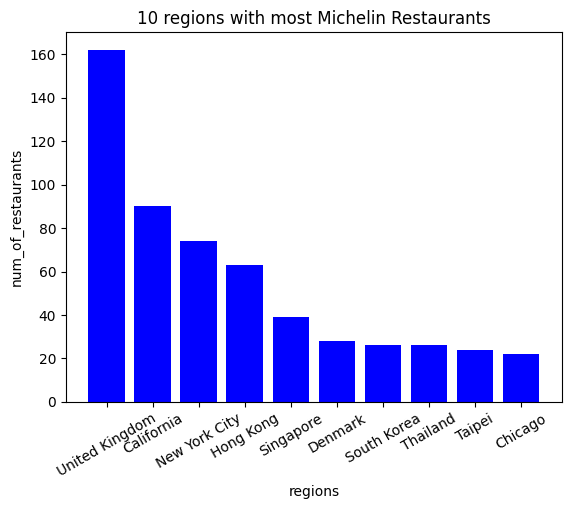

In [100]:
restaurants_per_region = {}

for i in range(df.shape[0]):
    if df.loc[i,'region'] not in restaurants_per_region.keys():
        restaurants_per_region[df.loc[i,'region']] = 1
    else: 
        restaurants_per_region[df.loc[i,'region']] += 1

marklist = sorted(restaurants_per_region.items(), key=lambda x: x[1], reverse = True)
sortdict = dict(marklist[0:10])

graph = Graph()
graph.histogram(sortdict.keys(),sortdict.values(),'blue','regions','num_of_restaurants', '10 regions with most Michelin Restaurants')


## 2. Michelin restaurants in each Nordic country  

C:\Users\Gymnasiet\AppData\Local\Temp\ipykernel_19520\3523079044.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  nordic_countries = {region_counts.index[i]: region_counts[i] for i in range(len(region_counts)) if region_counts.index[i] in nordic_countries.keys()}


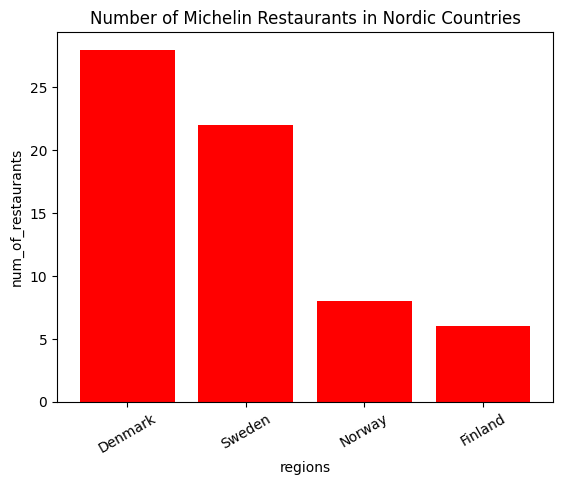

In [99]:
region_counts = df['region'].value_counts()
nordic_countries = {'Denmark': 0, 'Sweden': 0, 'Finland':0, 'Norway':0 }

nordic_countries = {region_counts.index[i]: region_counts[i] for i in range(len(region_counts)) if region_counts.index[i] in nordic_countries.keys()}

graph = Graph()
graph.histogram(nordic_countries.keys(),nordic_countries.values(),'red','regions','num_of_restaurants', 'Number of Michelin Restaurants in Nordic Countries')

## 3. Number of 1,2 and 3 stars Michelin Restaurant in Sweden

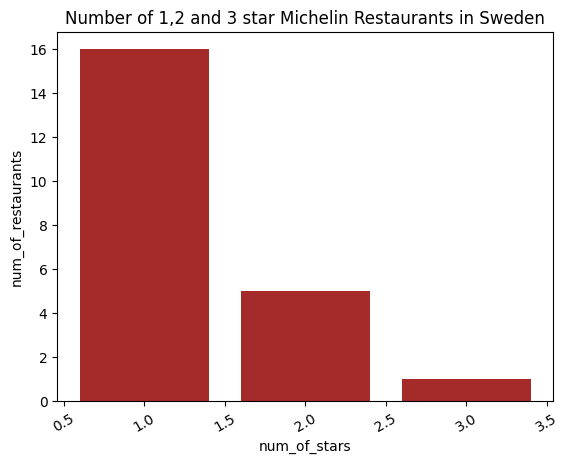

In [98]:
group_region = df.groupby('region')
df_sweden = group_region.get_group('Sweden')
sweden_stars = df_sweden['stars'].value_counts()
sweden_stars_dict = {sweden_stars.index[i]: sweden_stars[sweden_stars.index[i]] for i in range(len(sweden_stars))}

graph = Graph()
graph.histogram(sweden_stars_dict.keys(), sweden_stars_dict.values(),'brown','num_of_stars','num_of_restaurants', 'Number of 1,2 and 3 star Michelin Restaurants in Sweden')

## 4. Number of Swedish Restaurants per Cuisine

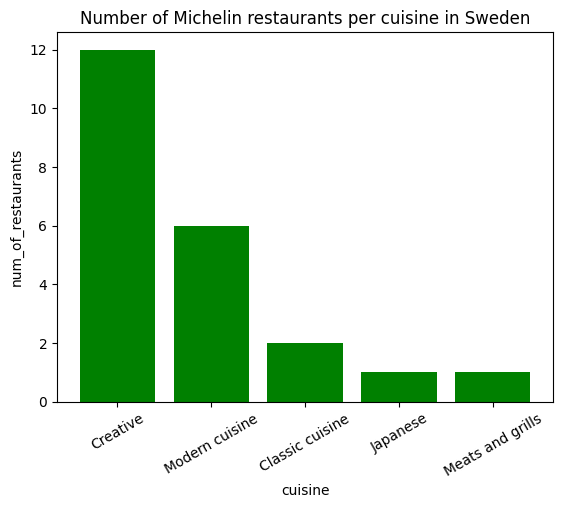

In [97]:
group_region = df.groupby('region')
df_sweden = group_region.get_group('Sweden')
sweden_cuisine = df_sweden['cuisine'].value_counts()
sweden_cuisine_dict = {sweden_cuisine.index[i]: sweden_cuisine[sweden_cuisine.index[i]] for i in range(len(sweden_cuisine))}

graph = Graph()
graph.histogram(sweden_cuisine_dict.keys(),sweden_cuisine_dict.values() ,'green','cuisine','num_of_restaurants', 'Number of Michelin restaurants per cuisine in Sweden')

## 5. Number of restaurants per Cuisine

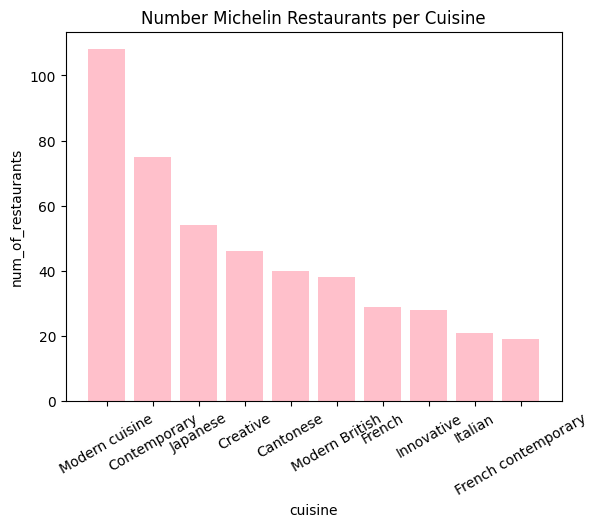

In [101]:
cuisine_count = df['cuisine'].value_counts()
cuisine_count_dict = {cuisine_count.index[i]: cuisine_count[cuisine_count.index[i]] for i in range(len(cuisine_count))}
cuise_list = list(cuisine_count_dict.items())

graph = Graph()
graph.histogram(dict(cuise_list[0:10]).keys(),dict(cuise_list[0:10]).values(),'pink','cuisine','num_of_restaurants', 'Number Michelin Restaurants per Cuisine')

## 6. Show in map all Mucelin Restaurants

In [26]:
df['price'].value_counts()

price
$$$$     197
$$$      143
$$        75
$$$$$     73
$         31
Name: count, dtype: int64

### Convert price to integer numbers

In [103]:
import numpy as np

price_map = {'$':1, '$$':2, '$$$':3, '$$$$':4, '$$$$$':5 , 'nan':0}
for i in range(df.shape[0]):
    if df.loc[i, 'price'] != 0:
        df.loc[i, 'price_num'] =  price_map[df.loc[i, 'price']]
    else:
        df.loc[i, 'price_num'] = 0
df.head()


,name,year,latitude,longitude,city,region,zipCode,cuisine,price,url,stars,price_num
0,Kilian Stuba,2019,47.348580,10.17114,Kleinwalsertal,Austria,87568,Creative,$$$$$,https://guide.michelin.com/at/en/vorarlberg/kl...,1,5.0
1,Pfefferschiff,2019,47.837870,13.07917,Hallwang,Austria,5300,Classic cuisine,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...,1,5.0
2,Esszimmer,2019,47.806850,13.03409,Salzburg,Austria,5020,Creative,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...,1,5.0
3,Carpe Diem,2019,47.800010,13.04006,Salzburg,Austria,5020,Market cuisine,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...,1,5.0
4,Edvard,2019,48.216503,16.36852,Wien,Austria,1010,Modern cuisine,$$$$,https://guide.michelin.com/at/en/vienna/wien/r...,1,4.0


### install dependencies

In [ ]:
pip install geopandas

In [ ]:
pip install folium

In [ ]:
pip install mapclassify

In [ ]:
pip install branca

In [145]:
#Import the necessary libraries
import pandas as pd
import folium
import matplotlib.colors as mcolors
import branca.colormap as cm



# Create a folium map centered on the average latitude and longitude
map_center = [df['latitude'].mean(), df['longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=2)

colormap = cm.LinearColormap(colors=['yellow','orange','red'], vmin=0, vmax=5, caption='Value')

# Define a function to get a color from the colormap
def get_marker_color(value):
    return colormap(value)

# Add markers for each location
for idx, row in df.iterrows():
    html = f"""
    <h4>{row['name']}</h4>
    <p><b>latitude:</b>{row['latitude']}</p>
    <p><b>longitude:</b> {row['longitude']}</p>
    <p><b>price:</b> {row['price_num']}</p>
    <p><b>stars:</b> {row['stars']}</p>
    """
    iframe = folium.IFrame(html=html, width=200, height=150)
    popup = folium.Popup(iframe, max_width=250)

    marker_color = get_marker_color(row['price_num'])
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=popup,
        icon=folium.Icon(color='white', icon_color=marker_color, icon='info-sign')
    ).add_to(mymap)

colormap.caption = 'ptice'
colormap.add_to(mymap)


# Display the map
mymap

## 7. Number of Mucelin Restaurants according to price Category

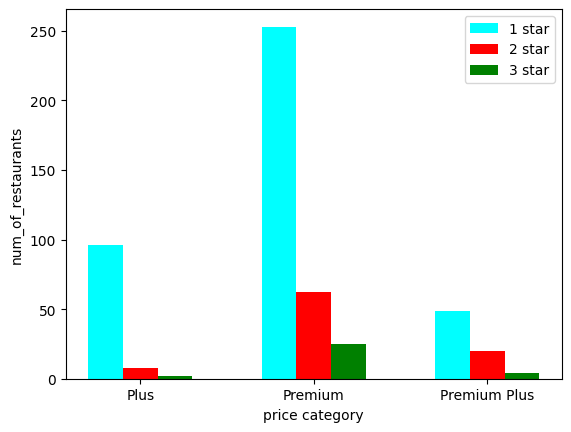

In [107]:
# map prices to price category
for i in range(df.shape[0]):
    if df.loc[i,'price'] in ['$', '$$']:
        df.loc[i,'price_category'] = 'Plus'
    elif df.loc[i,'price'] in ['$$$', '$$$$']:
        df.loc[i,'price_category'] = 'Premium'
    elif df.loc[i,'price'] in ['$$$$$']:
        df.loc[i,'price_category'] = 'Premium Plus'


price_category = df['price_category'].value_counts()

# find stars for every price category
Plus_stars = df.loc[df['price_category'] == 'Plus', 'stars'].value_counts()
Premium_stars = df.loc[df['price_category'] == 'Premium', 'stars'].value_counts()
PremiumPlus_stars = df.loc[df['price_category'] == 'Premium Plus', 'stars'].value_counts()


data_plot = {'Plus':Plus_stars,'Premium':Premium_stars,'Premium_Plus':PremiumPlus_stars}
df_stars = pd.DataFrame(data_plot)

x = np.arange(3)
y1 = df_stars.iloc[0,:]
y2 = df_stars.iloc[1,:]
y3 = df_stars.iloc[2,:]

plt.bar(x-0.2, y1, 0.2, color='cyan') 
plt.bar(x, y2, 0.2, color='red')  
plt.bar(x+0.2, y3, 0.2, color='green') 
plt.xticks(x, ['Plus', 'Premium', 'Premium Plus']) 
plt.xlabel("price category") 
plt.ylabel("num_of_restaurants") 
plt.legend(["1 star", "2 star", "3 star"]) 
plt.show() 


# 3. Modular Coding

## Data Analysis

In [127]:
class Coordinate:
    def __init__(self, latitude, longitude):
        self.latitude = latitude
        self.longitude = longitude

class Restaurant:
    def __init__(self, name, year, city, region, cuisine, price, stars, coordinate):
        self.name = name
        self.year = year
        self.city = city
        self.region = region
        self.cuisine = cuisine
        self.price = price
        self.stars = stars
        self.coordinate = coordinate

class DataAnalysis:
    def __init__(self, data_input):
        self.df = data_input
        self.num_rows = self.df.shape[0]

    def filter_restaurants(self, filter_type, filter_value):
        filtered_restaurants = []
        
        for i in range(self.num_rows):
            if self.df.loc[i, filter_type] == filter_value:
                restaurant = self.create_restaurant_object(i)
                filtered_restaurants.append(restaurant)
                
        return filtered_restaurants
    
    def create_restaurant_object(self, row_index):
        return Restaurant(
            name=self.df.loc[row_index, 'name'],
            year=self.df.loc[row_index, 'year'],
            city=self.df.loc[row_index, 'city'],
            region=self.df.loc[row_index, 'region'],
            cuisine=self.df.loc[row_index, 'cuisine'],
            price=self.df.loc[row_index, 'price'],
            stars=self.df.loc[row_index, 'stars'],
            coordinate=Coordinate(
                latitude=self.df.loc[row_index, 'latitude'],
                longitude=self.df.loc[row_index, 'longitude']
            )
        )

# Example usage:
if __name__ == '__main__':
    df = pd.read_csv('michelin-restaurants.csv')


    # Initialize DataAnalysis object
    data_analysis = DataAnalysis(df)

    print('-----------------------------------------------')
    print('----- all the restaurants that belong to specific cuisine  -------')
    print(data_analysis.filter_restaurants('cuisine', 'Creative'))
    print('-----------------------------------------------')


    print('-----------------------------------------------')
    print('----- all the restaurants have the same stars  -------')
    print(data_analysis.filter_restaurants('stars', 3))
    print('-----------------------------------------------')

    print('-----------------------------------------------')
    print('----- all the restaurants are in the specific city  -------')
    print(data_analysis.filter_restaurants('city', 'Wien'))
    print('-----------------------------------------------')

    print('-----------------------------------------------')
    print('----- all the Michelin restaurantslocated in Gothenburg -------')
    print(data_analysis.filter_restaurants('city', 'Göteborg'))
    print('-----------------------------------------------')
   

-----------------------------------------------
----- all the restaurants that belong to specific cuisine  -------
[<__main__.Restaurant object at 0x000001DD6A335D60>, <__main__.Restaurant object at 0x000001DD6A335BB0>, <__main__.Restaurant object at 0x000001DD6A334EC0>, <__main__.Restaurant object at 0x000001DD6A336150>, <__main__.Restaurant object at 0x000001DD6A336690>, <__main__.Restaurant object at 0x000001DD6A3376E0>, <__main__.Restaurant object at 0x000001DD6A337950>, <__main__.Restaurant object at 0x000001DD6A337AA0>, <__main__.Restaurant object at 0x000001DD6A337860>, <__main__.Restaurant object at 0x000001DD6A336A80>, <__main__.Restaurant object at 0x000001DD6A3373E0>, <__main__.Restaurant object at 0x000001DD6A336030>, <__main__.Restaurant object at 0x000001DD6A335B50>, <__main__.Restaurant object at 0x000001DD6A335F40>, <__main__.Restaurant object at 0x000001DD6A337A40>, <__main__.Restaurant object at 0x000001DD6A336960>, <__main__.Restaurant object at 0x000001DD6A3373B0>, 

## Data Visualization

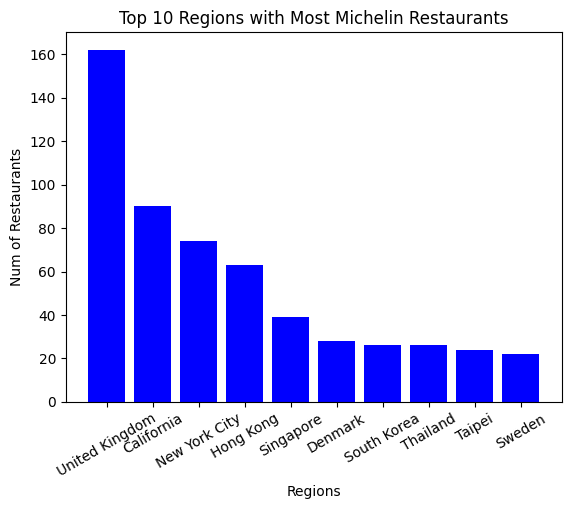

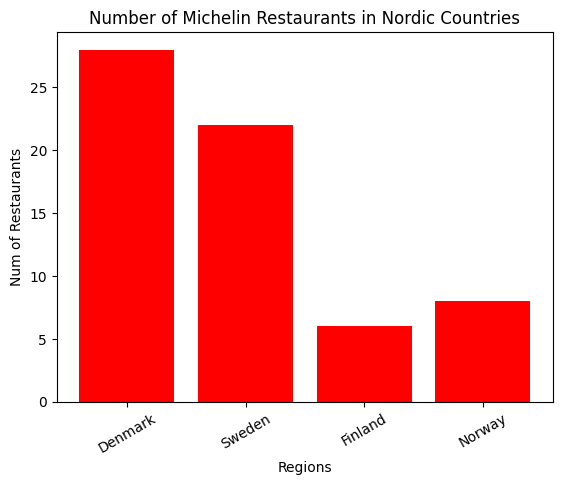

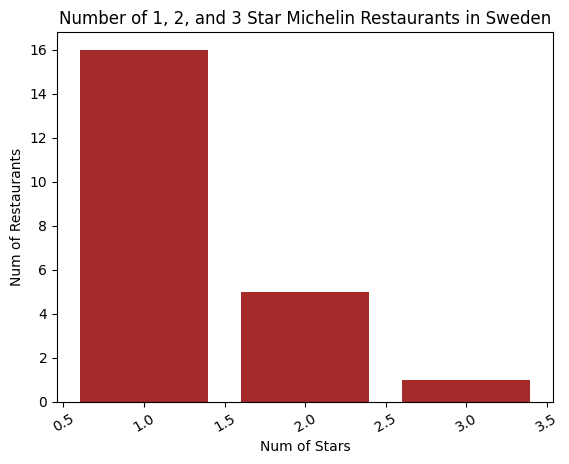

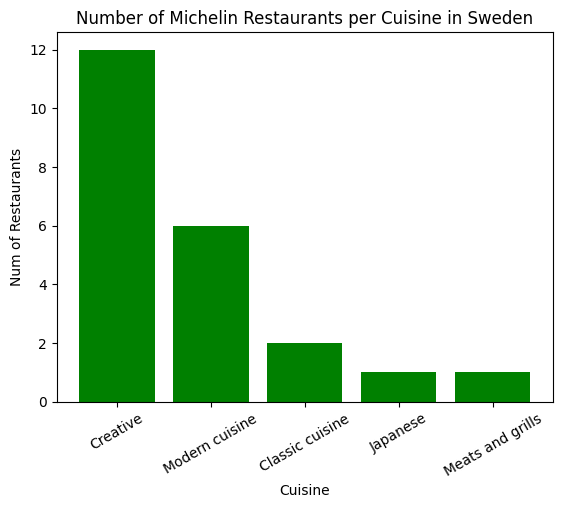

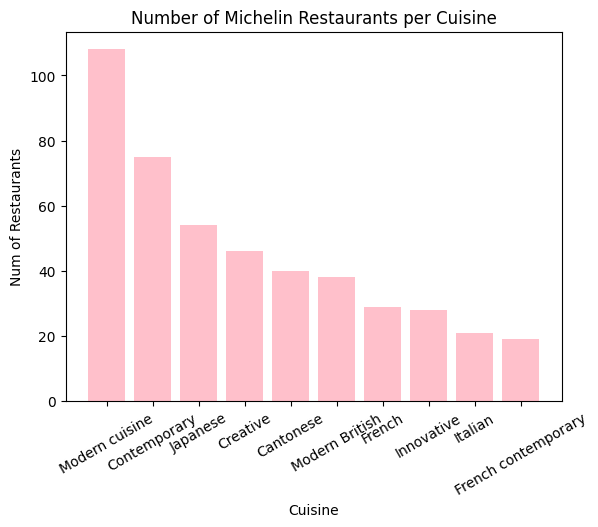

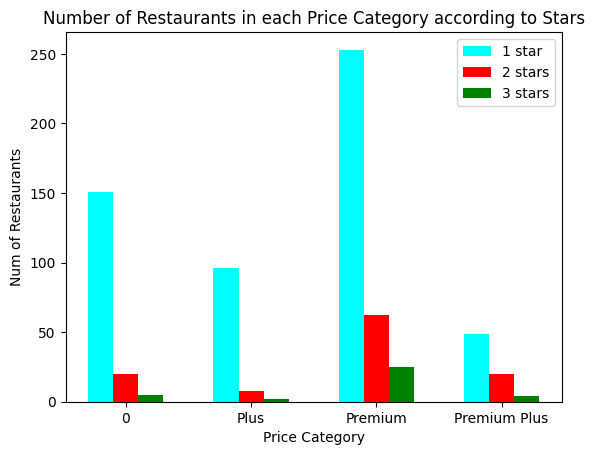

Your map should have been opened in your browser automatically.
Press ctrl+c to return.


In [2]:
import pandas as pd
import folium
import branca.colormap as cm
import matplotlib.pyplot as plt
import numpy as np

class DataVisualization:
    def __init__(self, data_input) -> None:
        self.df = data_input
        self.num_rows = self.df.shape[0]

    def plot_histogram(self, x, y, color, xlabel, ylabel, title):
        plt.bar(x, y, color=color)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
        plt.xticks(rotation=30)
        plt.show()

    def plot_multiple_bar(self, x, y1, y2, y3, xlabel, ylabel, xticks, legend, title):
        bar_width = 0.2
        plt.bar(x - bar_width, y1, bar_width, color='cyan')
        plt.bar(x, y2, bar_width, color='red')
        plt.bar(x + bar_width, y3, bar_width, color='green')

        plt.xticks(x, xticks)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.legend(legend)
        plt.title(title)
        plt.show()

    def get_filtered_data(self, column, top_n=10):
        return self.df[column].value_counts().nlargest(top_n)

    def restaurants_per_region(self):
        region_counts = self.get_filtered_data('region')
        self.plot_histogram(region_counts.index, region_counts.values, 'blue', 'Regions', 'Num of Restaurants', 'Top 10 Regions with Most Michelin Restaurants')

    def nordic_restaurants(self):
        nordic_countries = ['Denmark', 'Sweden', 'Finland', 'Norway']
        region_counts = self.df['region'].value_counts()
        nordic_counts = {country: region_counts[country] for country in nordic_countries if country in region_counts}

        self.plot_histogram(nordic_counts.keys(), nordic_counts.values(), 'red', 'Regions', 'Num of Restaurants', 'Number of Michelin Restaurants in Nordic Countries')

    def sweden_restaurants(self, filter_type, color, xlabel, ylabel, title):
        sweden_df = self.df[self.df['region'] == 'Sweden']
        sweden_counts = sweden_df[filter_type].value_counts()

        self.plot_histogram(sweden_counts.index, sweden_counts.values, color, xlabel, ylabel, title)

    def cuisine_types(self):
        cuisine_counts = self.get_filtered_data('cuisine')
        self.plot_histogram(cuisine_counts.index, cuisine_counts.values, 'pink', 'Cuisine', 'Num of Restaurants', 'Number of Michelin Restaurants per Cuisine')

    def price_map(self):
        price_map = {'$': 1, '$$': 2, '$$$': 3, '$$$$': 4, '$$$$$': 5, 0: 0}
        self.df['price_num'] = self.df['price'].map(price_map)

    def categorize_price(self):
        price_category_map = {
            '$': 'Plus', '$$': 'Plus',
            '$$$': 'Premium', '$$$$': 'Premium',
            '$$$$$': 'Premium Plus'
        }
        self.df['price_category'] = self.df['price'].map(price_category_map).fillna(0)

    def map_restaurants(self):
        self.price_map()
        map_center = [self.df['latitude'].mean(), self.df['longitude'].mean()]
        mymap = folium.Map(location=map_center, zoom_start=2)

        colormap = cm.LinearColormap(colors=['yellow', 'orange', 'red'], vmin=0, vmax=5, caption='Price')

        for _, row in self.df.iterrows():
            html = f"""
            <h4>{row['name']}</h4>
            <p><b>Latitude:</b> {row['latitude']}</p>
            <p><b>Longitude:</b> {row['longitude']}</p>
            <p><b>Price:</b> {row['price']}</p>
            <p><b>Stars:</b> {row['stars']}</p>
            """
            iframe = folium.IFrame(html=html, width=200, height=150)
            popup = folium.Popup(iframe, max_width=250)

            marker_color = colormap(row['price_num'])
            folium.Marker(
                location=[row['latitude'], row['longitude']],
                popup=popup,
                icon=folium.Icon(color='white', icon_color=marker_color, icon='info-sign')
            ).add_to(mymap)

        colormap.add_to(mymap)
        mymap.show_in_browser()

    def price_category_stars(self):
        self.categorize_price()
        star_counts = self.df.groupby('price_category')['stars'].value_counts().unstack().fillna(0)

        x = np.arange(len(star_counts.index))
        y1 = star_counts[1].values
        y2 = star_counts[2].values
        y3 = star_counts[3].values

        self.plot_multiple_bar(x, y1, y2, y3, 'Price Category', 'Num of Restaurants', star_counts.index, ['1 star', '2 stars', '3 stars'], 'Number of Restaurants in each Price Category according to Stars')


if __name__ == '__main__':
    df = pd.read_csv('michelin-restaurants.csv').fillna(0)
    data_visualization = DataVisualization(df)
    data_visualization.restaurants_per_region()
    data_visualization.nordic_restaurants()
    data_visualization.sweden_restaurants('stars', 'brown', 'Num of Stars', 'Num of Restaurants', 'Number of 1, 2, and 3 Star Michelin Restaurants in Sweden')
    data_visualization.sweden_restaurants('cuisine', 'green', 'Cuisine', 'Num of Restaurants', 'Number of Michelin Restaurants per Cuisine in Sweden')
    data_visualization.cuisine_types()
    data_visualization.price_category_stars()
    data_visualization.map_restaurants()